## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


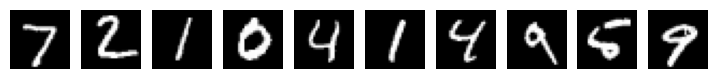

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.2454 - val_loss: 0.2052
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1843 - val_loss: 0.1649
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1557 - val_loss: 0.1492
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1463 - val_loss: 0.1436
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1420 - val_loss: 0.1399
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1390 - val_loss: 0.1381
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1366 - val_loss: 0.1361
Epoch 8/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1346 - val_loss: 0.1349
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1331 - val_loss: 0.1335
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1317 - val_

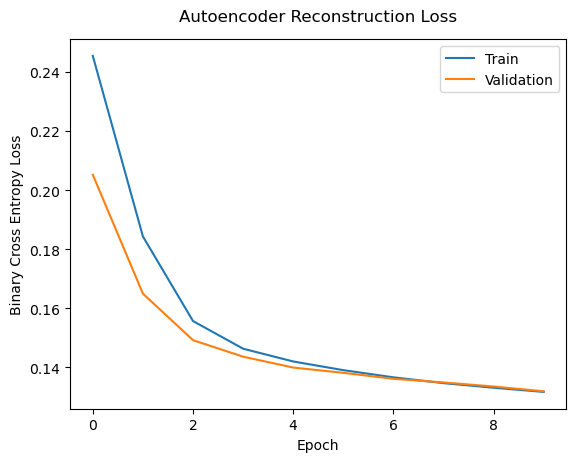

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 3ms/step


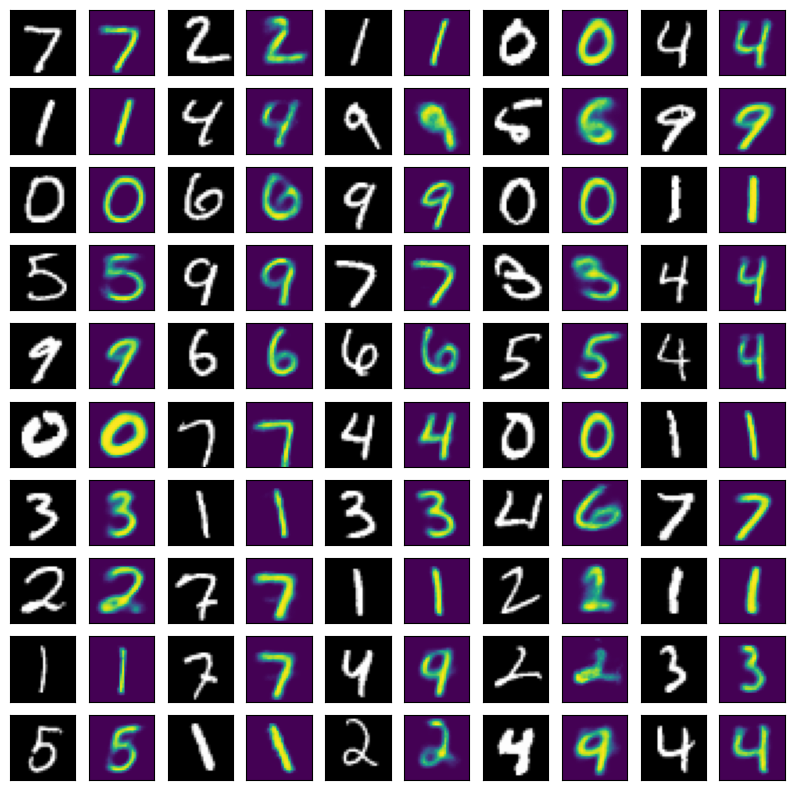

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [8]:
autoencoder.save('initially_trained_autoencoder.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 17ms/step
(1, 784)


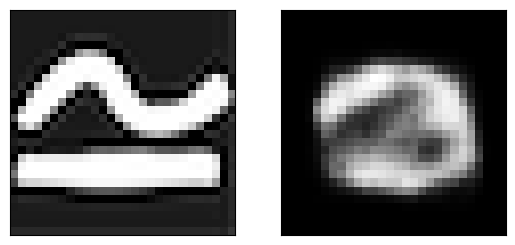

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

The variable "latent_vec_len" in an autoencoder program represents the size of the latent vector, which is the compressed representation of the input image after it has been processed by the encoder.

The size of the latent vector, represented by the "latent_vec_len" variable, has a direct impact on the image recognition capabilities of the autoencoder. After changing the bottleneck value from 16 to 6 in our model, we observed that the model still performed well, as shown in the image above. However, the loss value for this modified model was 0.1317, which is higher than the loss value of 0.0971 obtained with a bottleneck value of 16. This suggests that a larger bottleneck size of 16 can result in a better model. Here when we tuned 6 in latent vector which is too small, it may not be able to capture all of the important features of the input image, leading to a loss of information and reduced image recognition performance Whereas trained autoencoder model reconstructed almost all correct images to the test images for which it has been trained on.

On the other hand, if the latent vector is too large, it may not be able to effectively compress the input image, resulting in overfitting and reduced generalization performance. Suppose in case if we increase the bottleneck size to 100, it can lead to an increase in the number of parameters in the model. This can cause overfitting if the model is not regularized properly. Moreover, a larger bottleneck layer size can also increase the computational complexity and training time of the model. In general, the size of the latent vector is a hyperparameter that must be tuned during the training process to achieve the best image recognition performance. A larger latent vector may be needed for more complex images, while a smaller latent vector may be sufficient for simpler images.
